In [1]:
'''
Quick Checkup:
All the results needed are in the last two cells.

First model is the Quadratic Linear regressor with features:
['DEWP', 'Iws','PRES','month', 'TEMP', 'day'].

Second model is the Random Forest regressor with all features included.

Plots below are auxiliaries for understanding data.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
df_1314_winter = df.loc[idx]
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


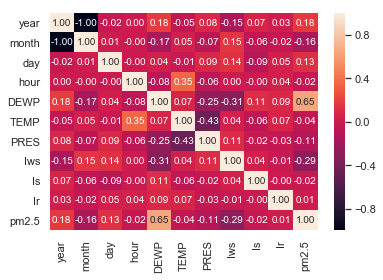

In [4]:
import seaborn as sns
cols = ['year','month', 'day','hour','DEWP','TEMP','PRES','Iws','Is','Ir','pm2.5']
cm = np.corrcoef(df_1314_winter[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show() 

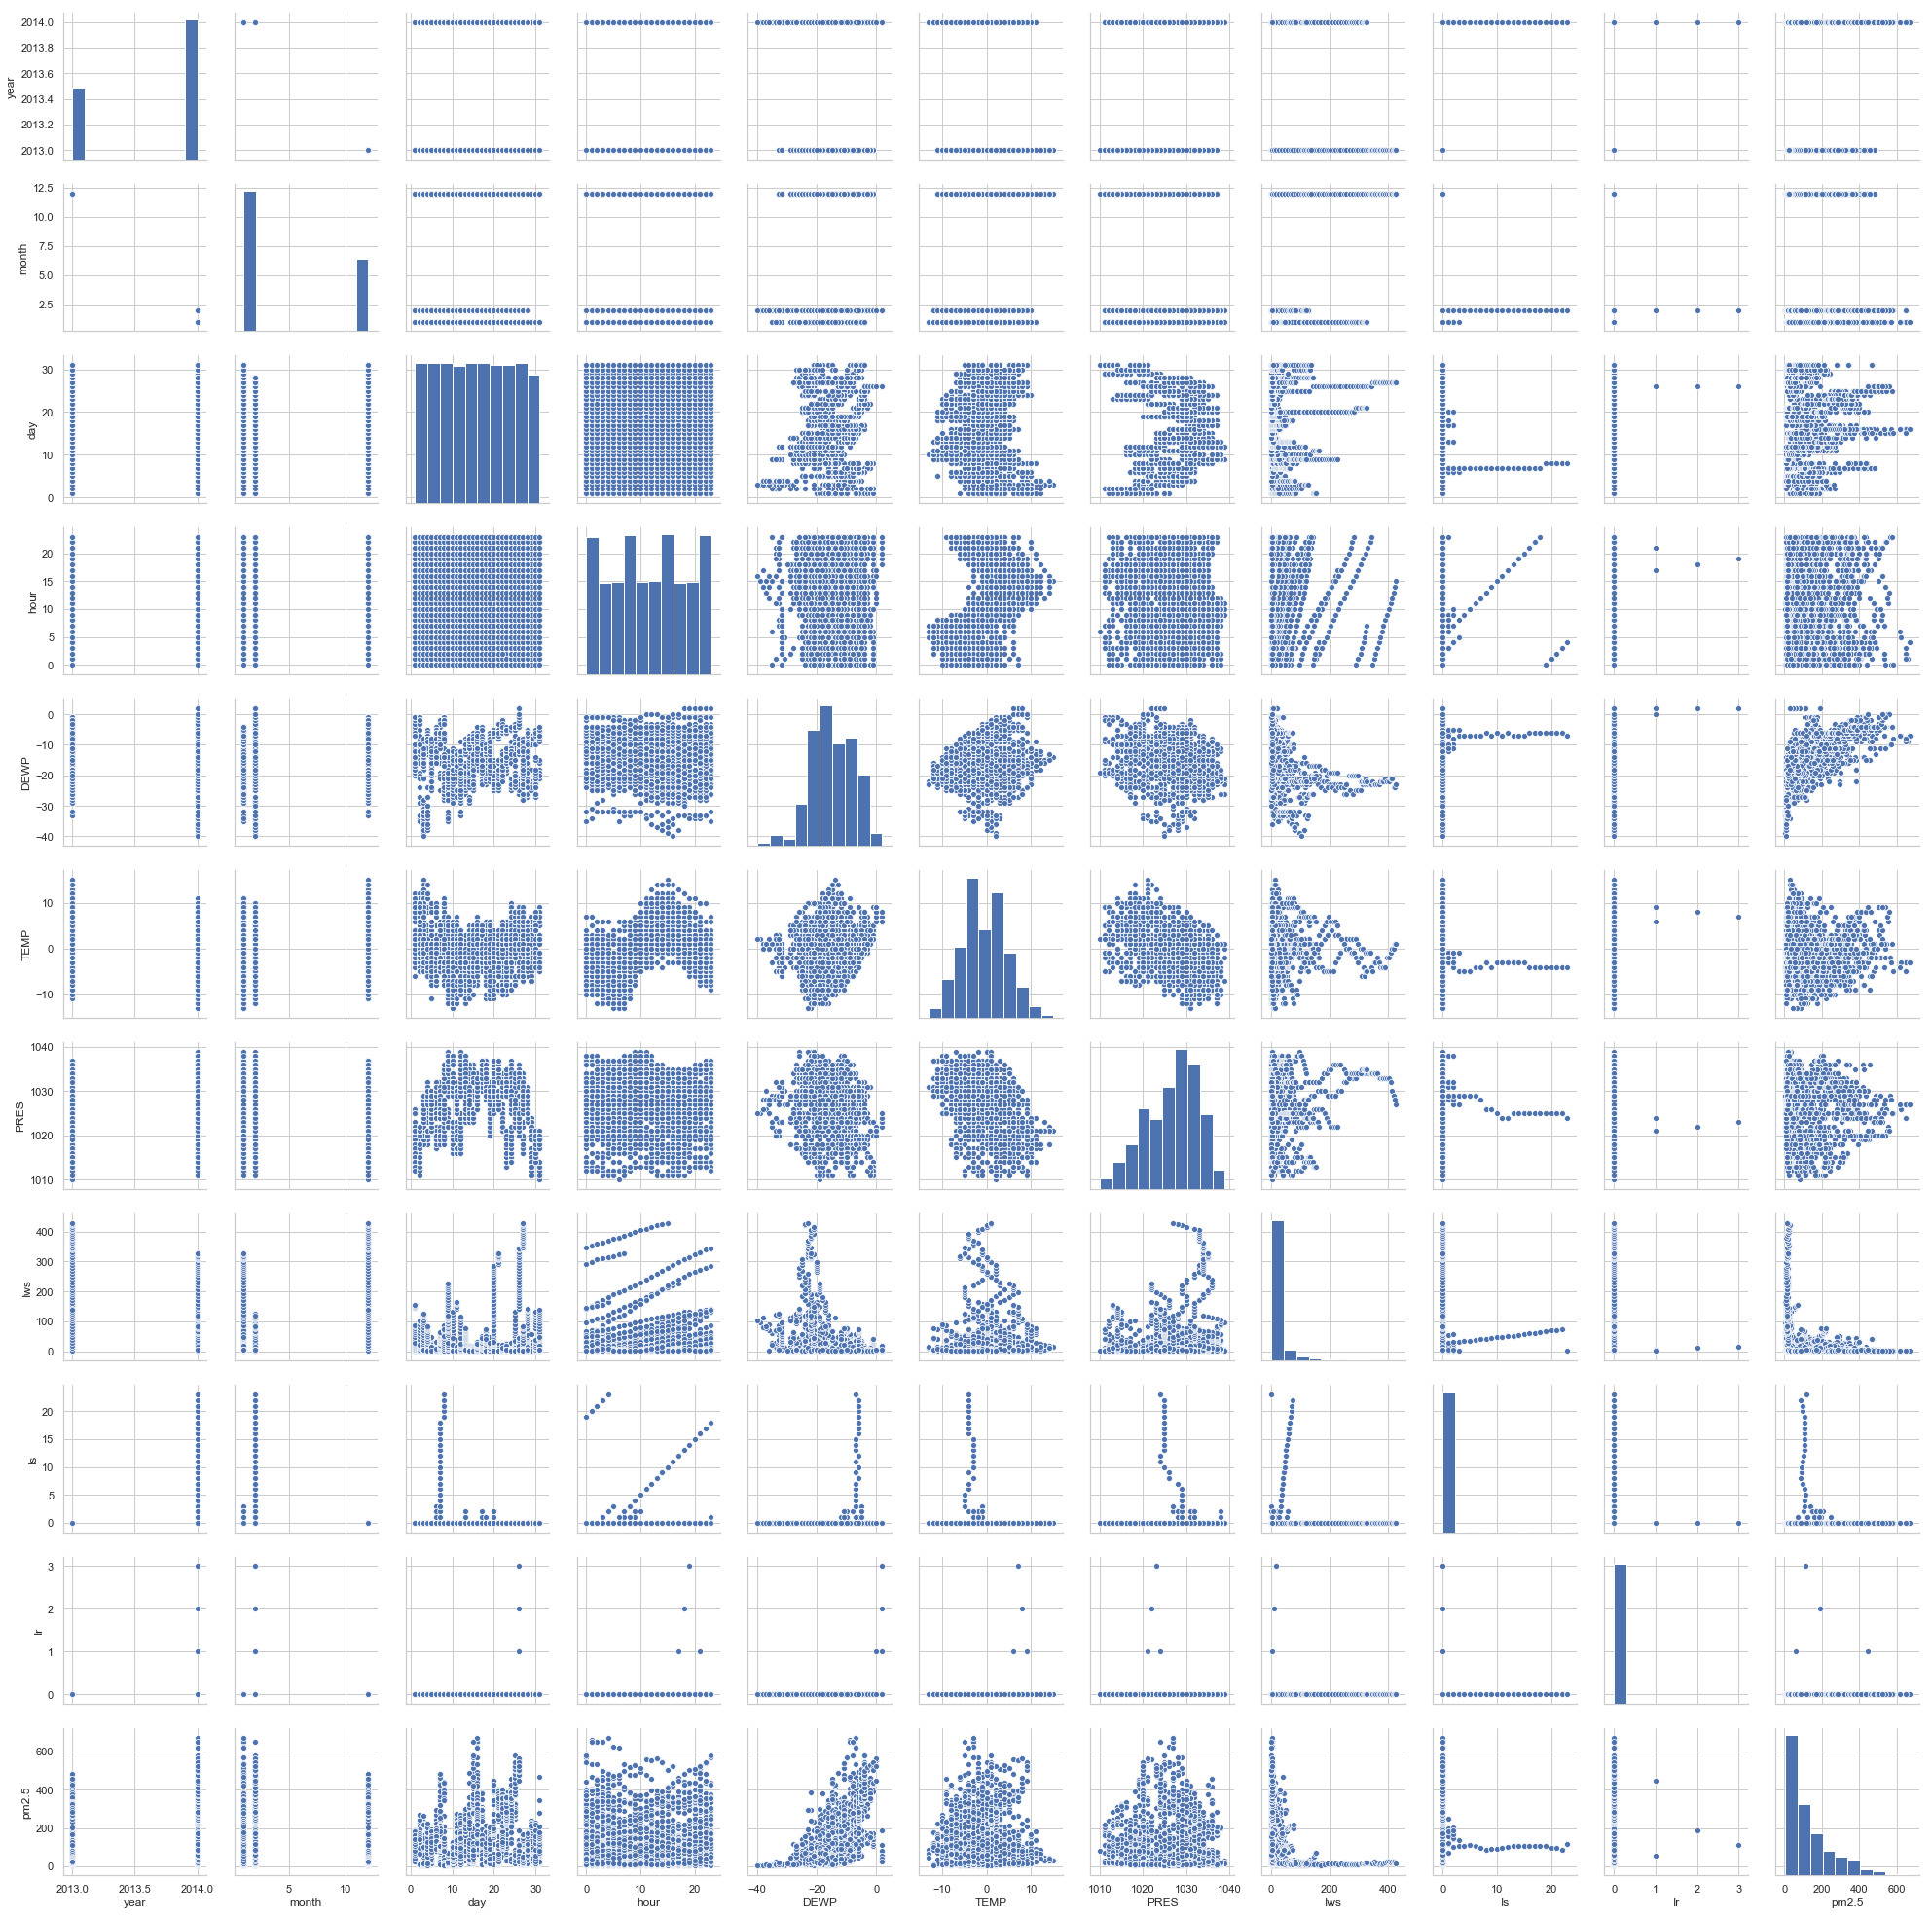

In [5]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_1314_winter[cols], height=2.5);
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_rm = X[['DEWP', 'Iws','PRES','month', 'TEMP', 'day']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_rm_std = sc_x.fit_transform(X_rm)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

slr = LinearRegression()
# fit 
slr.fit(X_rm_std, y_std)

print('Slopes:')
print(slr.coef_)
print('Intercept/bias (w_0): %.2f' % slr.intercept_)

Slopes:
[ 0.61292349 -0.10664775  0.01243811 -0.04016276 -0.07168754  0.11888848]
Intercept/bias (w_0): 0.00


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_rm_train, X_rm_test, y_train, y_test = train_test_split(
    X_rm, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_rm_train.shape[0])
print('#Testing data points: %d' % X_rm_test.shape[0])

# Standardization

sc = StandardScaler()
sc.fit(X_rm_train)
X_rm_train_std = sc.transform(X_rm_train)
X_rm_test_std = sc.transform(X_rm_test)

# Training

slr = LinearRegression()
slr.fit(X_rm_train_std, y_train)

# Testing

y_rm_train_pred = slr.predict(X_rm_train_std)
y_rm_test_pred = slr.predict(X_rm_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_rm_train_pred),
       mean_squared_error(y_test, y_rm_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_rm_train_pred),
                                       r2_score(y_test, y_rm_test_pred)))

#Training data points: 1491
#Testing data points: 639
MSE train: 8551.69, test: 8952.82
R^2 train: 0.46, test: 0.43


In [9]:
from sklearn.preprocessing import PolynomialFeatures

regr = LinearRegression()

# Create quadratic features
square = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quadratic = PolynomialFeatures(degree=4)


print('[Linear]')
print('#Features: %d' % X_rm_train_std.shape[1])
regr = regr.fit(X_rm_train_std, y_train)
y_train_pred = regr.predict(X_rm_train_std)
y_test_pred = regr.predict(X_rm_test_std)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))
print('\n[Square]')
X_rm_sq_train = square.fit_transform(X_rm_train_std)
X_rm_sq_test = square.fit_transform(X_rm_test_std)
print('#Features: %d' % X_rm_sq_train.shape[1])
regr = regr.fit(X_rm_sq_train, y_train)
y_train_pred = regr.predict(X_rm_sq_train)
y_test_pred = regr.predict(X_rm_sq_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Cubic]')
X_rm_cubic_train = cubic.fit_transform(X_rm_train_std)
X_rm_cubic_test = cubic.fit_transform(X_rm_test_std)
print('#Features: %d' % X_rm_cubic_train.shape[1])
regr = regr.fit(X_rm_cubic_train, y_train)
y_train_pred = regr.predict(X_rm_cubic_train)
y_test_pred = regr.predict(X_rm_cubic_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Quadratic]')
X_rm_quad_train = quadratic.fit_transform(X_rm_train_std)
X_rm_quad_test = quadratic.fit_transform(X_rm_test_std)
print('#Features: %d' % X_rm_quad_train.shape[1])
regr = regr.fit(X_rm_quad_train, y_train)
y_train_pred = regr.predict(X_rm_quad_train)
y_test_pred = regr.predict(X_rm_quad_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

[Linear]
#Features: 6
MSE train: 8551.69, test: 8952.82
R^2 train: 0.46, test: 0.43

[Square]
#Features: 28
MSE train: 5981.08, test: 6452.88
R^2 train: 0.62, test: 0.59

[Cubic]
#Features: 84
MSE train: 4491.16, test: 5342.26
R^2 train: 0.72, test: 0.66

[Quadratic]
#Features: 210
MSE train: 3150.50, test: 4083.41
R^2 train: 0.80, test: 0.74


In [24]:
# define a function for residual plot
def residual_plot(y_train, y_train_pred, y_test, y_test_pred):
  # Residual plot
    plt.scatter(
      y_train_pred,
      y_train_pred - y_train,
      c='blue',
      marker='o',
      label='Training data')
    plt.scatter(
      y_test_pred,
      y_test_pred - y_test,
      c='green',
      marker='s',
      label='Test data')



[Quadratic]
#Features: 210
MSE train: 3150.50, test: 4083.41
R^2 train: 0.80, test: 0.74


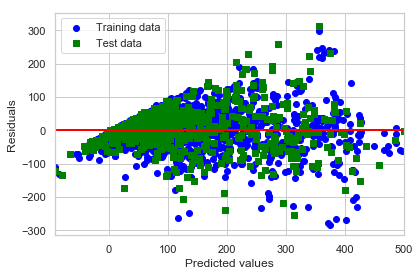

In [27]:
print('\n[Quadratic]')
X_rm_quad_train = quadratic.fit_transform(X_rm_train_std)
X_rm_quad_test = quadratic.fit_transform(X_rm_test_std)
print('#Features: %d' % X_rm_quad_train.shape[1])
regr = regr.fit(X_rm_quad_train, y_train)
y_train_pred = regr.predict(X_rm_quad_train)
y_test_pred = regr.predict(X_rm_quad_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

residual_plot(y_train, y_train_pred, y_test, y_test_pred)

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
xmin = min(y_train_pred.min(), y_test_pred.min())
xmax = max(y_train_pred.max(), y_test_pred.max())
plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')
plt.xlim([xmin, xmax])
plt.tight_layout()
plt.savefig('./output/residual-plot-quad-lr-png', dpi=300)
plt.show()

[RandomForest]
#Features: 11
MSE train: 201.72, test: 1485.69
R^2 train: 0.99, test: 0.90


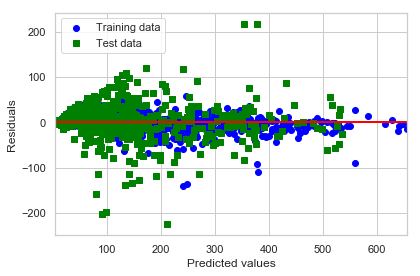

In [28]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('[RandomForest]')
print('#Features: %d' % X_train.shape[1])

forest = RandomForestRegressor(
     n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))
residual_plot(y_train, y_train_pred, y_test, y_test_pred)

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
xmin = min(y_train_pred.min(), y_test_pred.min())
xmax = max(y_train_pred.max(), y_test_pred.max())
plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')
plt.xlim([xmin, xmax])
plt.tight_layout()
plt.savefig('./output/residual-plot-random-forest.png', dpi=300)
plt.show()